In [1]:
from ema_workbench.analysis import parcoords

from problem_formulation import get_model_for_problem_formulation

import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


### Printing the result of the first optimization (step 1).

In [2]:
# read the data
results = pd.read_csv('intermediate outputs/step1 - first optimization output(100000,[0.1]).csv')
# set up the model
dike_model, planning_steps = get_model_for_problem_formulation(6)

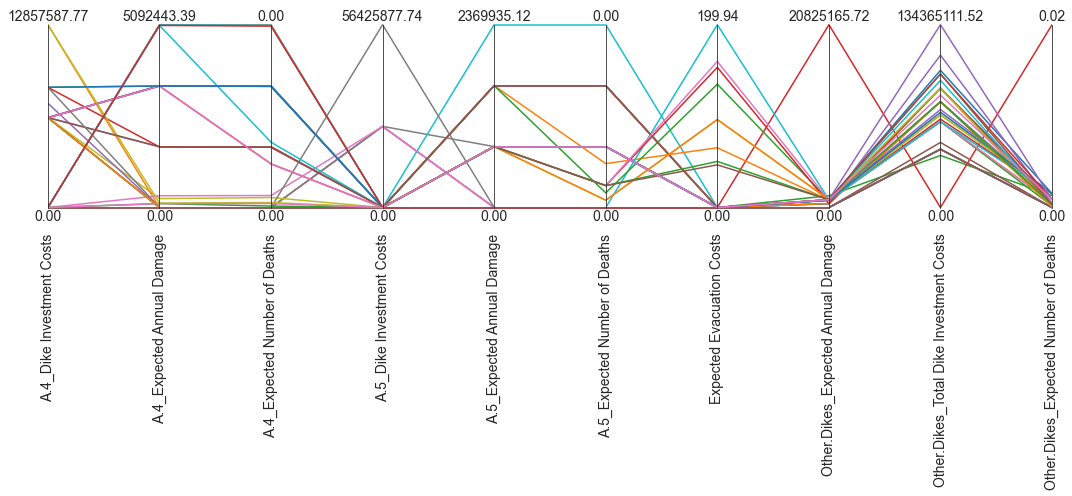

In [6]:
# visualization in the parallel coordinate plots

# we are keeping just the columns with the outcomes or a part of these outcomes
#data = results.loc[:, [o.name for o in dike_model.outcomes]] # all the outcomes
data = results.loc[:, [o for o in ['A.4_Dike Investment Costs', 'A.4_Expected Annual Damage',
       'A.4_Expected Number of Deaths', 'A.5_Dike Investment Costs',
       'A.5_Expected Annual Damage', 'A.5_Expected Number of Deaths',
       'Expected Evacuation Costs', 'Other.Dikes_Expected Annual Damage',
       'Other.Dikes_Total Dike Investment Costs',
       'Other.Dikes_Expected Number of Deaths']]]
limits = parcoords.get_limits(data) # creates a dataframe where for each outcome it gets the highest and lowest value
#limits.loc[0, ['utility', 'inertia', 'reliability', 'max_P']] = 0 # sets the lowerbound of each outcome to 0

paraxes = parcoords.ParallelAxes(limits) # creates the parallel axes
#paraxes.invert_axis('max_P') # flip direction for a particular outcome

# save figure
paraxes.plot(data) # put the data on the axes
plt.rcParams["figure.figsize"]=(15,7)
# if you wanna play with the size of the picture
#figure = plt.gcf()
#figure.set_size_inches(15, 25)

#plt.savefig("sample.png", dpi=100) # dpi is the resolution

plt.savefig('output pictures/step1 - results first optimization.png')

plt.show() # plots